# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow those simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November 4th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

In the exercises below, I describe the exercises in a general way. Drawing in the right parts of the exercises is part of the assignment. (That way we're helping you get a little bit more ready for the Final Project, where you have to decide what information to include in your report and analysis). 

# Part 1: Analyze the network

The questions in this part are based on Lecture 5.

* Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.
   - It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.
   - I would like you to include concepts like centrality and assortativity in your analysis.
   - Use a network backbone in your analysis.
   - In addition to standard distribution plots (e.g. degree distributions, etc), your analysis should also include at least one network visualization (but it doesn't have to display the entire network, you can also visualize a network backbone).
   - **Note**: As I write above, an important part of the exercise consists is *selecting the right elements of the lecture* to create a meaningful analysis. So don't solve this part by going exhaustive and just calculating everything you can think of in one massive analysis. Try to focus on using what you've learned to characterize the network. 

## Loading the network of rock performance

In [1]:
# Visualize the network using NetworkX.
import networkx as nx
import os
import re
import pickle

G = nx.DiGraph()

In [2]:
directory = "data/rock_performers/"

all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".pkl")]

all_performers = [os.path.splitext(os.path.basename(f))[0] for f in all_paths]

In [3]:
performer_set = set(all_performers)

In [25]:
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    # Load pickled page
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    # Extract all wiki links
    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)

    filtered_links = []
    for link in all_links:
        # Skip non-people links
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        # Take the displayed name if there is a pipe
        clean_link = re.split(r'\|', link)[-1]
        clean_link = clean_link.replace(" ", "_")

        # Only keep links to known performers and avoid self-loops
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)

    links_collection[performer] = filtered_links

In [31]:
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    try:
        with open(file_path, "rb") as f:
            wikitext = pickle.load(f)
    except EOFError:
        print(f"Skipping empty/corrupted file: {file_path}")
        continue

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []
    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        clean_link = re.split(r'\|', link)[-1].replace(" ", "_")
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)

    links_collection[performer] = filtered_links

In [32]:
for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        length_of_content = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, length_of_content=length_of_content, word_count=length_of_content)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

In [33]:
# Final clean ups:
isolated = list(nx.isolates(G))

G.remove_nodes_from(isolated)

## Visualize the graph of the network

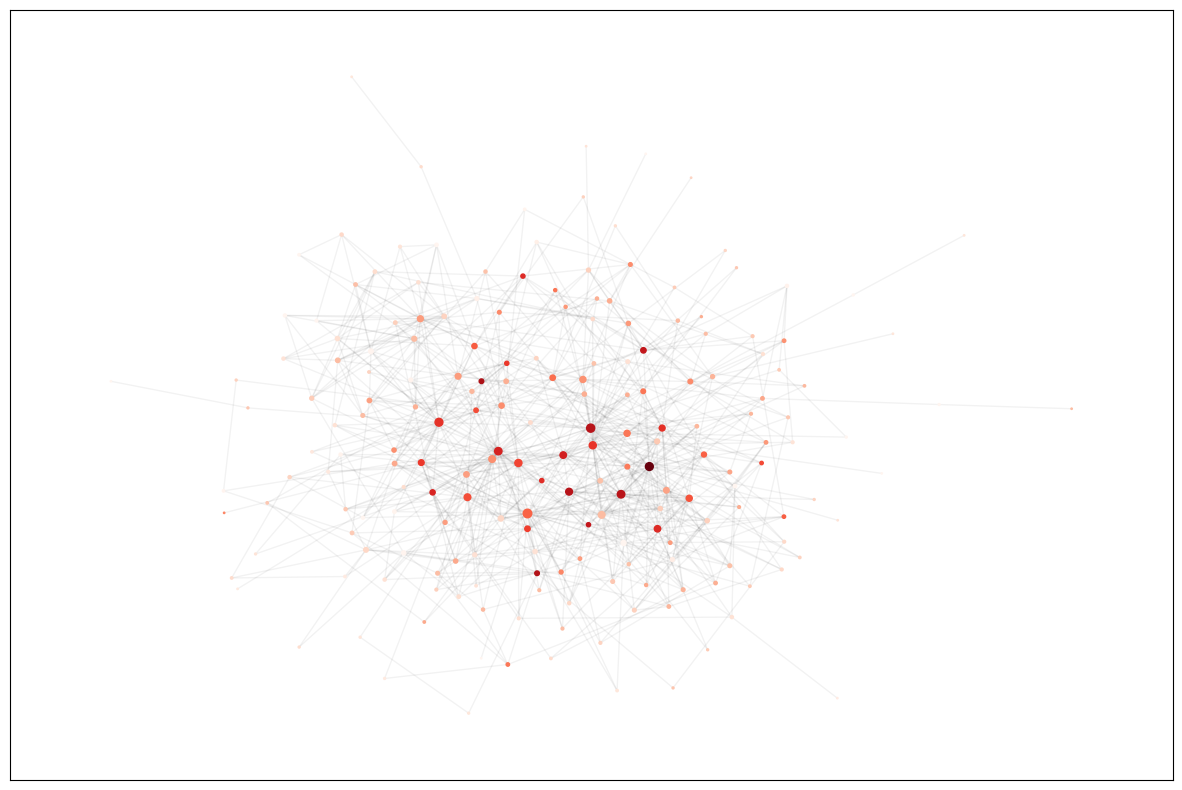

In [34]:
# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_length_of_content,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

# Part 2: Genres and communities and plotting 

The questions below are based on Lecture 7, part 2.

* Write about genres and modularity.
* Detect the communities, discuss the value of modularity in comparison to the genres.
* Calculate the matrix $D$ and discuss your findings.
* Plot the communities and comment on your results.

# Part 3: TF-IDF to understand genres and communities 

The questions below  are based on Lecture 7, part 2, 4, 5, 6 (and a little bit on part 3).

* Explain the concept of TF-IDF in your own words and how it can help you understand the genres and communities.
* Calculate and visualize TF-IDF for the genres and communities.
* Use the matrix $D$ (Lecture 7, part 2) to dicusss the difference between the word-clouds between genres and communities.

# Part 4: Sentiment of the artists and communities

The questions below are based on Lecture 8

* Calculate the sentiment of the band/artist pages (it is OK to work with the sub-network of artists-with-genre) and describe your findings using stats and visualization, inspired by the first exercise of week 8.
* Discuss the sentiment of the communities. Do the findings using TF-IDF during Lecture 7 help you understand your results?